In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../../src')
from ecomplexity import ecomplexity
import matplotlib.pyplot as plt

import matplotlib.ticker as ptick
import networkx as nx
import networkx.algorithms.bipartite as bip
plt.rcParams['font.family'] = 'Meiryo'
plt.rcParams['font.size'] = 15

# 小数点以下 桁数 6
pd.options.display.float_format = '{:.3f}'.format


In [2]:
import initial_condition
from analysis import weight
from analysis import rank as vr


In [3]:
global data_dir, output_dir
data_dir = '../../data/processed/internal/firms/'
output_dir = '../../output/'


In [4]:
# 初期条件
ar = initial_condition.AR
year_style = initial_condition.YEAR_STYLE

year_start = initial_condition.YEAR_START
year_end = initial_condition.YEAR_END
year_range = initial_condition.YEAR_RANGE

classification = initial_condition.CLASSIFICATION
class_weight = initial_condition.CLASS_WEIGHT
applicant_weight = initial_condition.APPLICANT_WEIGHT

extract_population = initial_condition.EXTRACT_POPULATION
top_p_or_num = initial_condition.TOP_P_OR_NUM
color_list = initial_condition.COLOR_LIST



In [5]:
top_p_or_num

('num', 500)

In [6]:
df = pd.read_csv(f'{data_dir}{ar}_{year_style}_{top_p_or_num[0]}_{top_p_or_num[1]}.csv')
df

,app_year_period,right_person_name,reg_num,schmoch35,diversity,kci,kh_1,kh_2,kh_3,kh_4,...,kh_11,kh_12,kh_13,kh_14,kh_15,kh_16,kh_17,kh_18,kh_19,kh_20
0,1981-1990,いすゞ自動車株式会社,1334.143,23,4,0.319,95.000,7.278,104.566,7.459,...,101.383,7.685,101.210,7.690,101.127,7.692,101.087,7.692,101.067,7.692
1,1981-1990,ぺんてる株式会社,586.500,22,9,0.611,103.111,8.229,101.525,7.957,...,101.268,7.712,101.186,7.703,101.132,7.698,101.097,7.696,101.076,7.694
2,1981-1990,アイジー工業株式会社,695.000,10,4,0.845,124.750,7.820,109.194,7.799,...,101.544,7.711,101.325,7.704,101.204,7.699,101.135,7.696,101.097,7.695
3,1981-1990,アキレス株式会社,352.333,18,7,0.473,102.429,7.502,102.332,7.651,...,101.260,7.701,101.171,7.698,101.119,7.695,101.088,7.694,101.070,7.693
4,1981-1990,アステラス製薬株式会社,431.167,17,6,1.542,90.833,9.039,102.682,8.376,...,101.794,7.745,101.498,7.722,101.315,7.709,101.205,7.701,101.139,7.697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974,2001-2010,ＴｉａｎｍａＪａｐａｎ株式会社,461.500,12,3,-0.869,84.333,7.473,92.407,7.797,...,97.729,7.868,97.930,7.871,98.038,7.874,98.096,7.875,98.127,7.876
1975,2001-2010,ＵＢＥ株式会社,1292.333,30,11,1.258,105.636,8.873,102.335,8.330,...,98.555,7.910,98.379,7.895,98.282,7.887,98.228,7.882,98.198,7.880
1976,2001-2010,ＵＤトラツクス株式会社,815.000,21,7,0.032,99.000,7.166,101.068,7.561,...,98.262,7.862,98.199,7.870,98.175,7.874,98.166,7.876,98.163,7.877
1977,2001-2010,ＹＫＫ株式会社,367.083,20,2,0.010,69.000,7.473,90.523,7.740,...,97.997,7.873,98.086,7.875,98.126,7.876,98.145,7.877,98.154,7.877


In [7]:
df[df['right_person_name']=='住友化学株式会社']

,app_year_period,right_person_name,reg_num,schmoch35,diversity,kci,kh_1,kh_2,kh_3,kh_4,...,kh_11,kh_12,kh_13,kh_14,kh_15,kh_16,kh_17,kh_18,kh_19,kh_20
150,1981-1990,住友化学株式会社,3234.750,30,6,1.466,108.500,8.806,105.382,8.268,...,101.785,7.740,101.487,7.719,101.306,7.707,101.198,7.701,101.135,7.697
638,1981-2010,住友化学株式会社,9792.027,31,8,1.417,117.750,9.286,108.663,8.727,...,102.687,8.183,102.385,8.159,102.209,8.146,102.107,8.139,102.047,8.135
1137,1991-2000,住友化学株式会社,2748.744,30,8,1.279,116.750,9.003,108.166,8.461,...,102.638,7.996,102.337,7.978,102.161,7.968,102.059,7.962,102.000,7.959
1635,2001-2010,住友化学株式会社,3808.533,29,10,1.081,107.100,8.636,101.698,8.280,...,98.481,7.908,98.340,7.893,98.261,7.886,98.217,7.882,98.192,7.880


<class 'matplotlib.axes._axes.Axes'>
1981-1990 -0.167
1991-2000 -0.217
2001-2010 -0.193


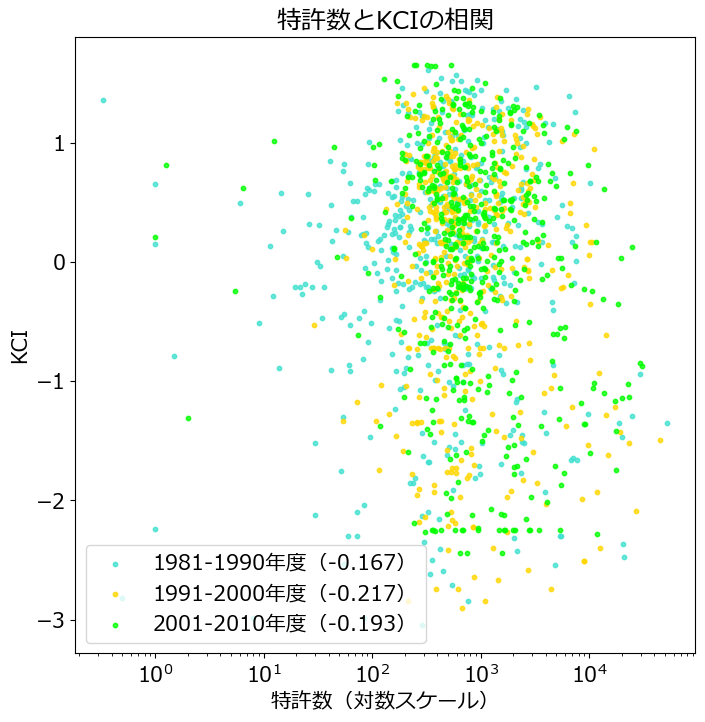

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))
print(type(ax))
color_count = 0
for period in range(year_start, year_end+1, year_range):
    period = f'{period}-{period+year_range-1}'
    corr_num = round(df[df[f'{ar}_{year_style}_period']==period]['reg_num'].corr(df[df[f'{ar}_{year_style}_period']==period]['kci']), 3)
    print(period, corr_num)
    ax.scatter(df[df[f'{ar}_{year_style}_period']==period]['reg_num'], 
               df[df[f'{ar}_{year_style}_period']==period]['kci'], s=10, 
            #    alpha=0.6, label=f'相関係数：{corr_num}', color=color_list[color_count])
               alpha=0.8, label=f'{period}年度（{corr_num}）', color=color_list[color_count])
    ax.set_title('特許数とKCIの相関')
    ax.set_xscale('log')
    # ax.set_yscale('log')
    
    ax.set_ylabel('KCI')
    ax.set_xlabel('特許数（対数スケール）')
    # ax.set_xlim(10**2, 10**5)
    ax.legend(loc='lower left')
    # ax.legend(loc='upper right')
    color_count += 1
    
# ax.scatter(df['reg_num'], df['eci'])

<class 'matplotlib.axes._axes.Axes'>
1981-1990 0.222
1991-2000 0.217
2001-2010 0.225


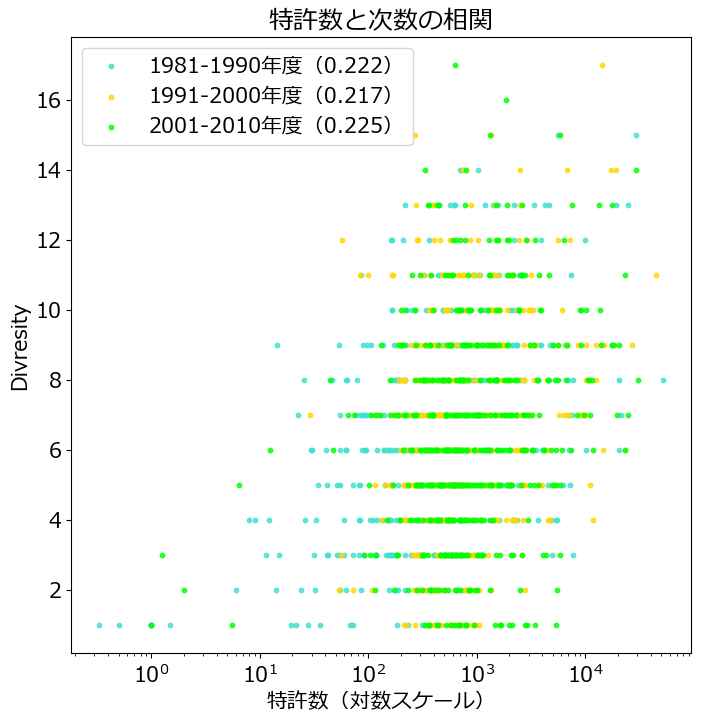

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))
print(type(ax))
color_count = 0
for period in range(year_start, year_end+1, year_range):
    period = f'{period}-{period+year_range-1}'
    corr_num = round(df[df[f'{ar}_{year_style}_period']==period]['reg_num'].corr(df[df[f'{ar}_{year_style}_period']==period]['diversity']), 3)
    print(period, corr_num)
    ax.scatter(df[df[f'{ar}_{year_style}_period']==period]['reg_num'], 
               df[df[f'{ar}_{year_style}_period']==period]['diversity'], s=10, 
            #    alpha=0.6, label=f'相関係数：{corr_num}', color=color_list[color_count])
               alpha=0.8, label=f'{period}年度（{corr_num}）', color=color_list[color_count])
    ax.set_title('特許数と次数の相関')
    ax.set_xscale('log')
    # ax.set_yscale('log')
    
    ax.set_ylabel('Divresity')
    ax.set_xlabel('特許数（対数スケール）')
    # ax.set_xlim(10**2, 10**5)
    # ax.legend(loc='lower right')
    ax.legend(loc='upper left')
    color_count += 1
    
# ax.scatter(df['reg_num'], df['eci'])

<class 'matplotlib.axes._axes.Axes'>
1981-1990 0.276
1991-2000 0.251
2001-2010 0.352


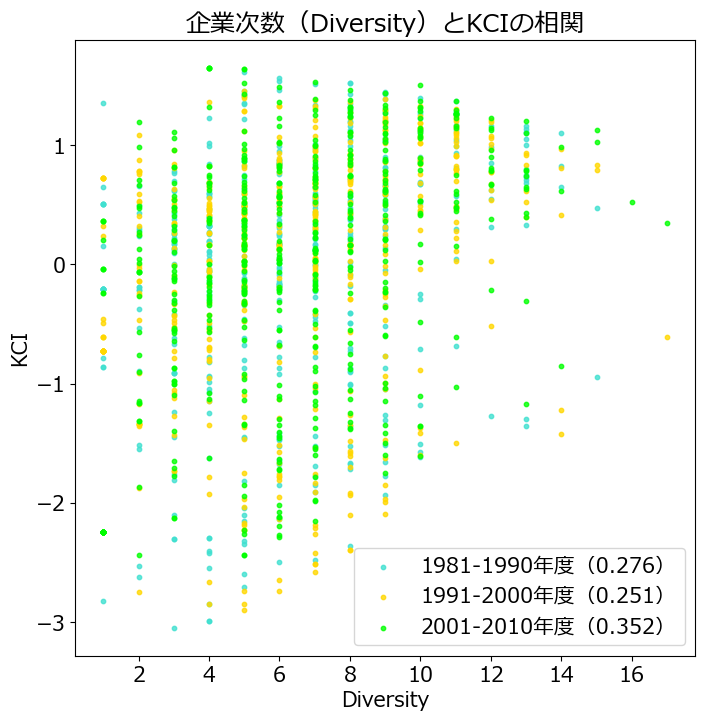

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))
print(type(ax))
color_count = 0
for period in range(year_start, year_end+1, year_range):
    period = f'{period}-{period+year_range-1}'
    corr_num = round(df[df[f'{ar}_{year_style}_period']==period]['diversity'].corr(df[df[f'{ar}_{year_style}_period']==period]['kci']), 3)
    print(period, corr_num)
    ax.scatter(df[df[f'{ar}_{year_style}_period']==period]['diversity'], 
               df[df[f'{ar}_{year_style}_period']==period]['kci'], s=10, 
            #    alpha=0.6, label=f'相関係数：{corr_num}', color=color_list[color_count])
               alpha=0.8, label=f'{period}年度（{corr_num}）', color=color_list[color_count])
    ax.set_title('企業次数（Diversity）とKCIの相関')
    # ax.set_xscale('log')
    # ax.set_yscale('log')
    
    ax.set_ylabel('KCI')
    ax.set_xlabel('Diversity')
    # ax.set_xlim(10**2, 10**5)
    ax.legend(loc='lower right')
    # ax.legend(loc='upper right')
    color_count += 1
    
# ax.scatter(df['reg_num'], df['eci'])

,app_year_period,right_person_name,diversity
136,1981-1990,三菱重工業株式会社,15
378,1981-1990,株式会社日立製作所,15
71,1981-1990,トリニテイ・インベストメント株式会社,14
306,1981-1990,株式会社クレハ,14
352,1981-1990,株式会社三井Ｅ＆Ｓホールデイングス,14
140,1981-1990,三菱電機株式会社,13
210,1981-1990,日本たばこ産業株式会社,13
229,1981-1990,日本製紙株式会社,13
242,1981-1990,日東電工株式会社,13
243,1981-1990,日機装株式会社,13


,app_year_period,right_person_name,diversity
1373,1991-2000,株式会社日立製作所,17
1163,1991-2000,国立研究開発法人科学技術振興機構,15
1419,1991-2000,独立行政法人科学技術振興機構,15
1034,1991-2000,セントラル硝子株式会社,14
1122,1991-2000,三菱重工業株式会社,14
1126,1991-2000,三菱電機株式会社,14
1162,1991-2000,国立研究開発法人産業技術総合研究所,14
1379,1991-2000,株式会社東芝,14
1164,1991-2000,国立研究開発法人農業・食品産業技術総合研究機構,13
1174,1991-2000,大日精化工業株式会社,13


,app_year_period,right_person_name,diversity
1656,2001-2010,国立大学法人東京工業大学,17
1887,2001-2010,株式会社豊田中央研究所,16
1660,2001-2010,国立研究開発法人産業技術総合研究所,15
1916,2001-2010,独立行政法人科学技術振興機構,15
1565,2001-2010,パナソニツクホールデイングス株式会社,14
1627,2001-2010,中部電力株式会社,14
1657,2001-2010,国立大学法人東北大学,14
1661,2001-2010,国立研究開発法人科学技術振興機構,13
1675,2001-2010,大阪瓦斯株式会社,13
1713,2001-2010,日本板硝子株式会社,13


c:\Users\rin\Desktop\ObjectiveDirectory\notebooks\3_analysis\../../src\analysis\rank.py:315: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


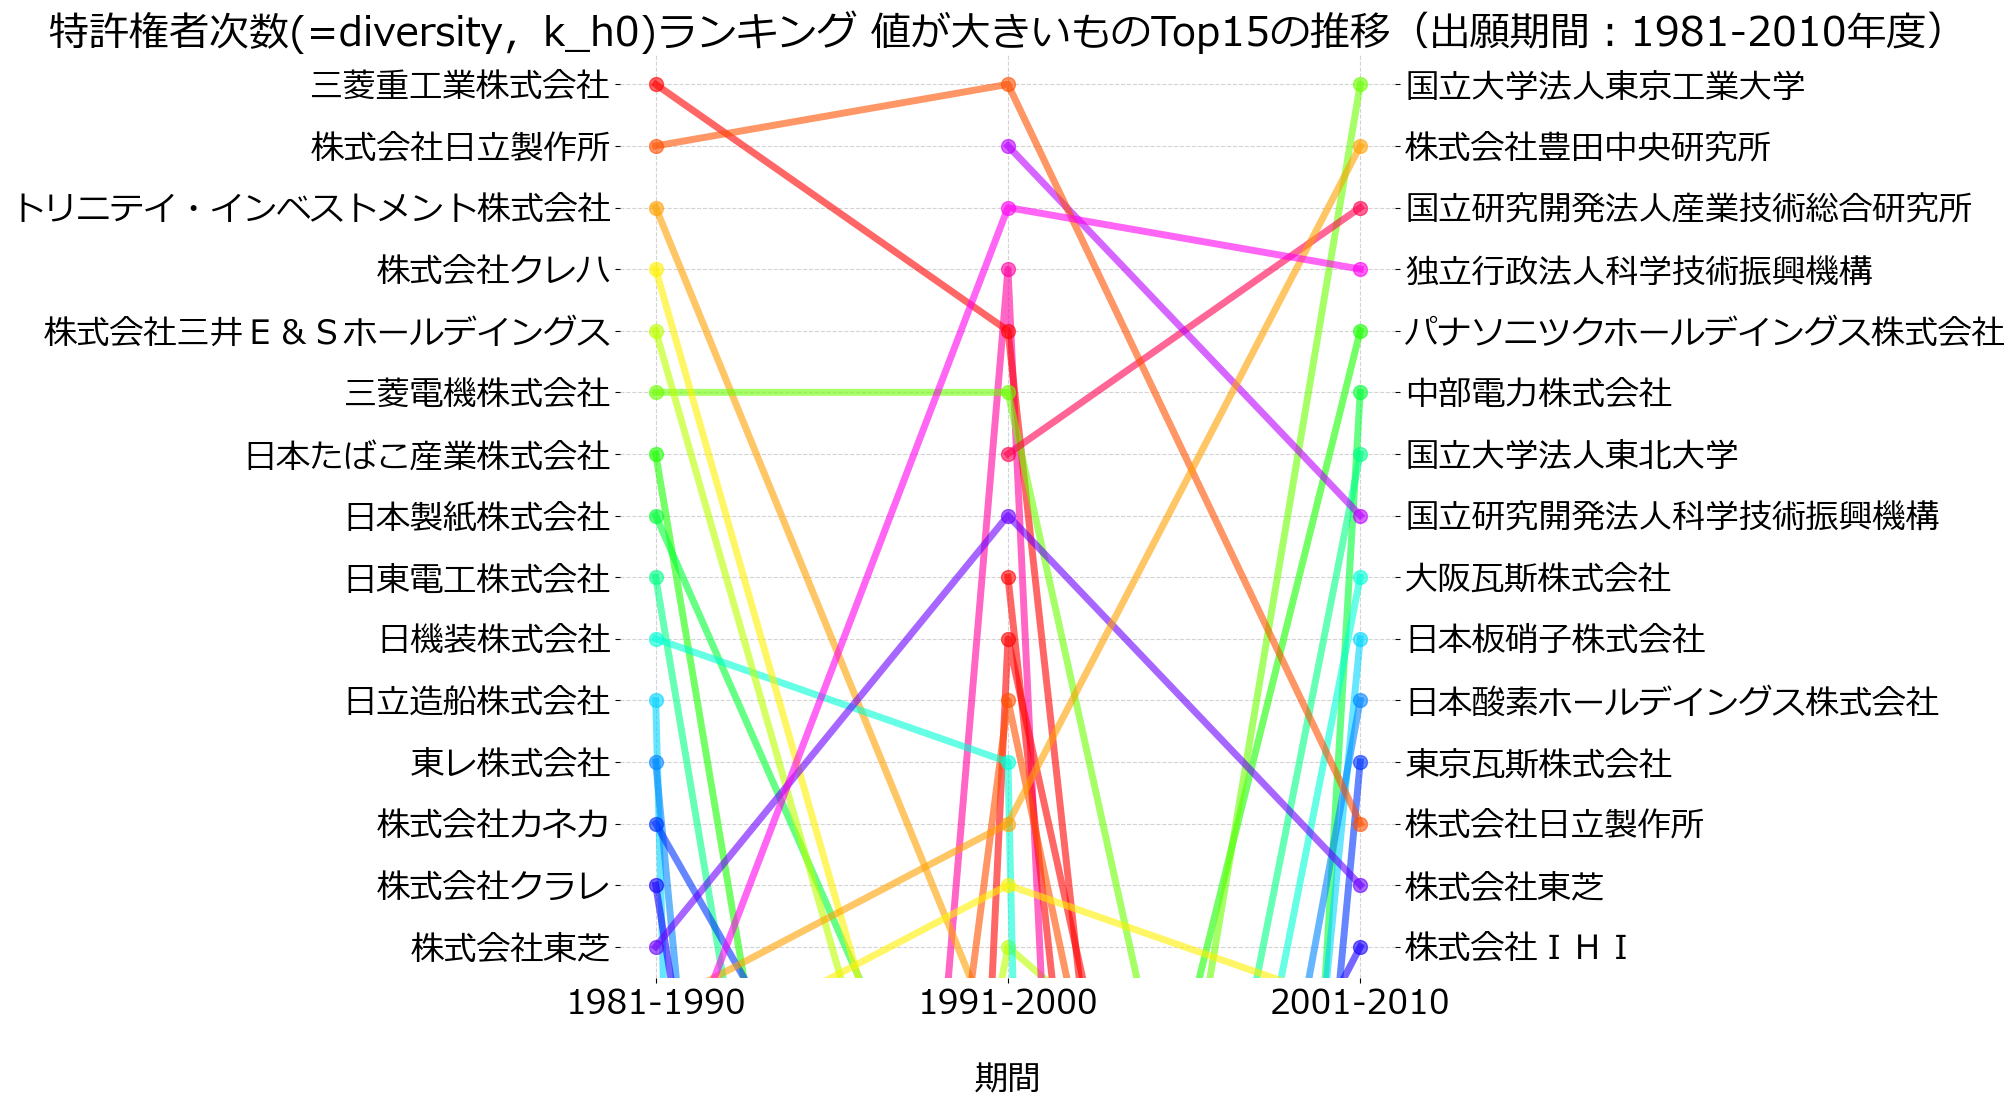

,app_year_period,right_person_name,kci
177,1981-1990,大塚製薬株式会社,1.610
428,1981-1990,田辺三菱製薬株式会社,1.567
4,1981-1990,アステラス製薬株式会社,1.542
166,1981-1990,味の素株式会社,1.523
246,1981-1990,日産化学株式会社,1.520
435,1981-1990,第一三共株式会社,1.515
150,1981-1990,住友化学株式会社,1.466
379,1981-1990,株式会社明治,1.458
109,1981-1990,ライオン株式会社,1.446
244,1981-1990,日油株式会社,1.442


,app_year_period,right_person_name,kci
1424,1991-2000,田辺三菱製薬株式会社,1.459
1374,1991-2000,株式会社明治,1.412
1049,1991-2000,デユポン・東レ・スペシヤルテイ・マテリアル株式会社,1.394
1453,1991-2000,ＥＮＥＯＳ株式会社,1.384
1240,1991-2000,日産化学株式会社,1.380
1078,1991-2000,ポリプラスチツクス株式会社,1.362
1155,1991-2000,味の素株式会社,1.360
1238,1991-2000,日油株式会社,1.333
1171,1991-2000,大塚製薬株式会社,1.333
988,1991-2000,アステラス製薬株式会社,1.330


,app_year_period,right_person_name,kci
1487,2001-2010,アステラス製薬株式会社,1.650
1906,2001-2010,武田薬品工業株式会社,1.650
1921,2001-2010,田辺三菱製薬株式会社,1.650
1928,2001-2010,第一三共株式会社,1.650
1673,2001-2010,大正製薬株式会社,1.643
1871,2001-2010,株式会社明治,1.643
1668,2001-2010,大塚化学株式会社,1.534
1546,2001-2010,デユポン・東レ・スペシヤルテイ・マテリアル株式会社,1.520
1617,2001-2010,三菱瓦斯化学株式会社,1.504
1700,2001-2010,日揮触媒化成株式会社,1.489


c:\Users\rin\Desktop\ObjectiveDirectory\notebooks\3_analysis\../../src\analysis\rank.py:315: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


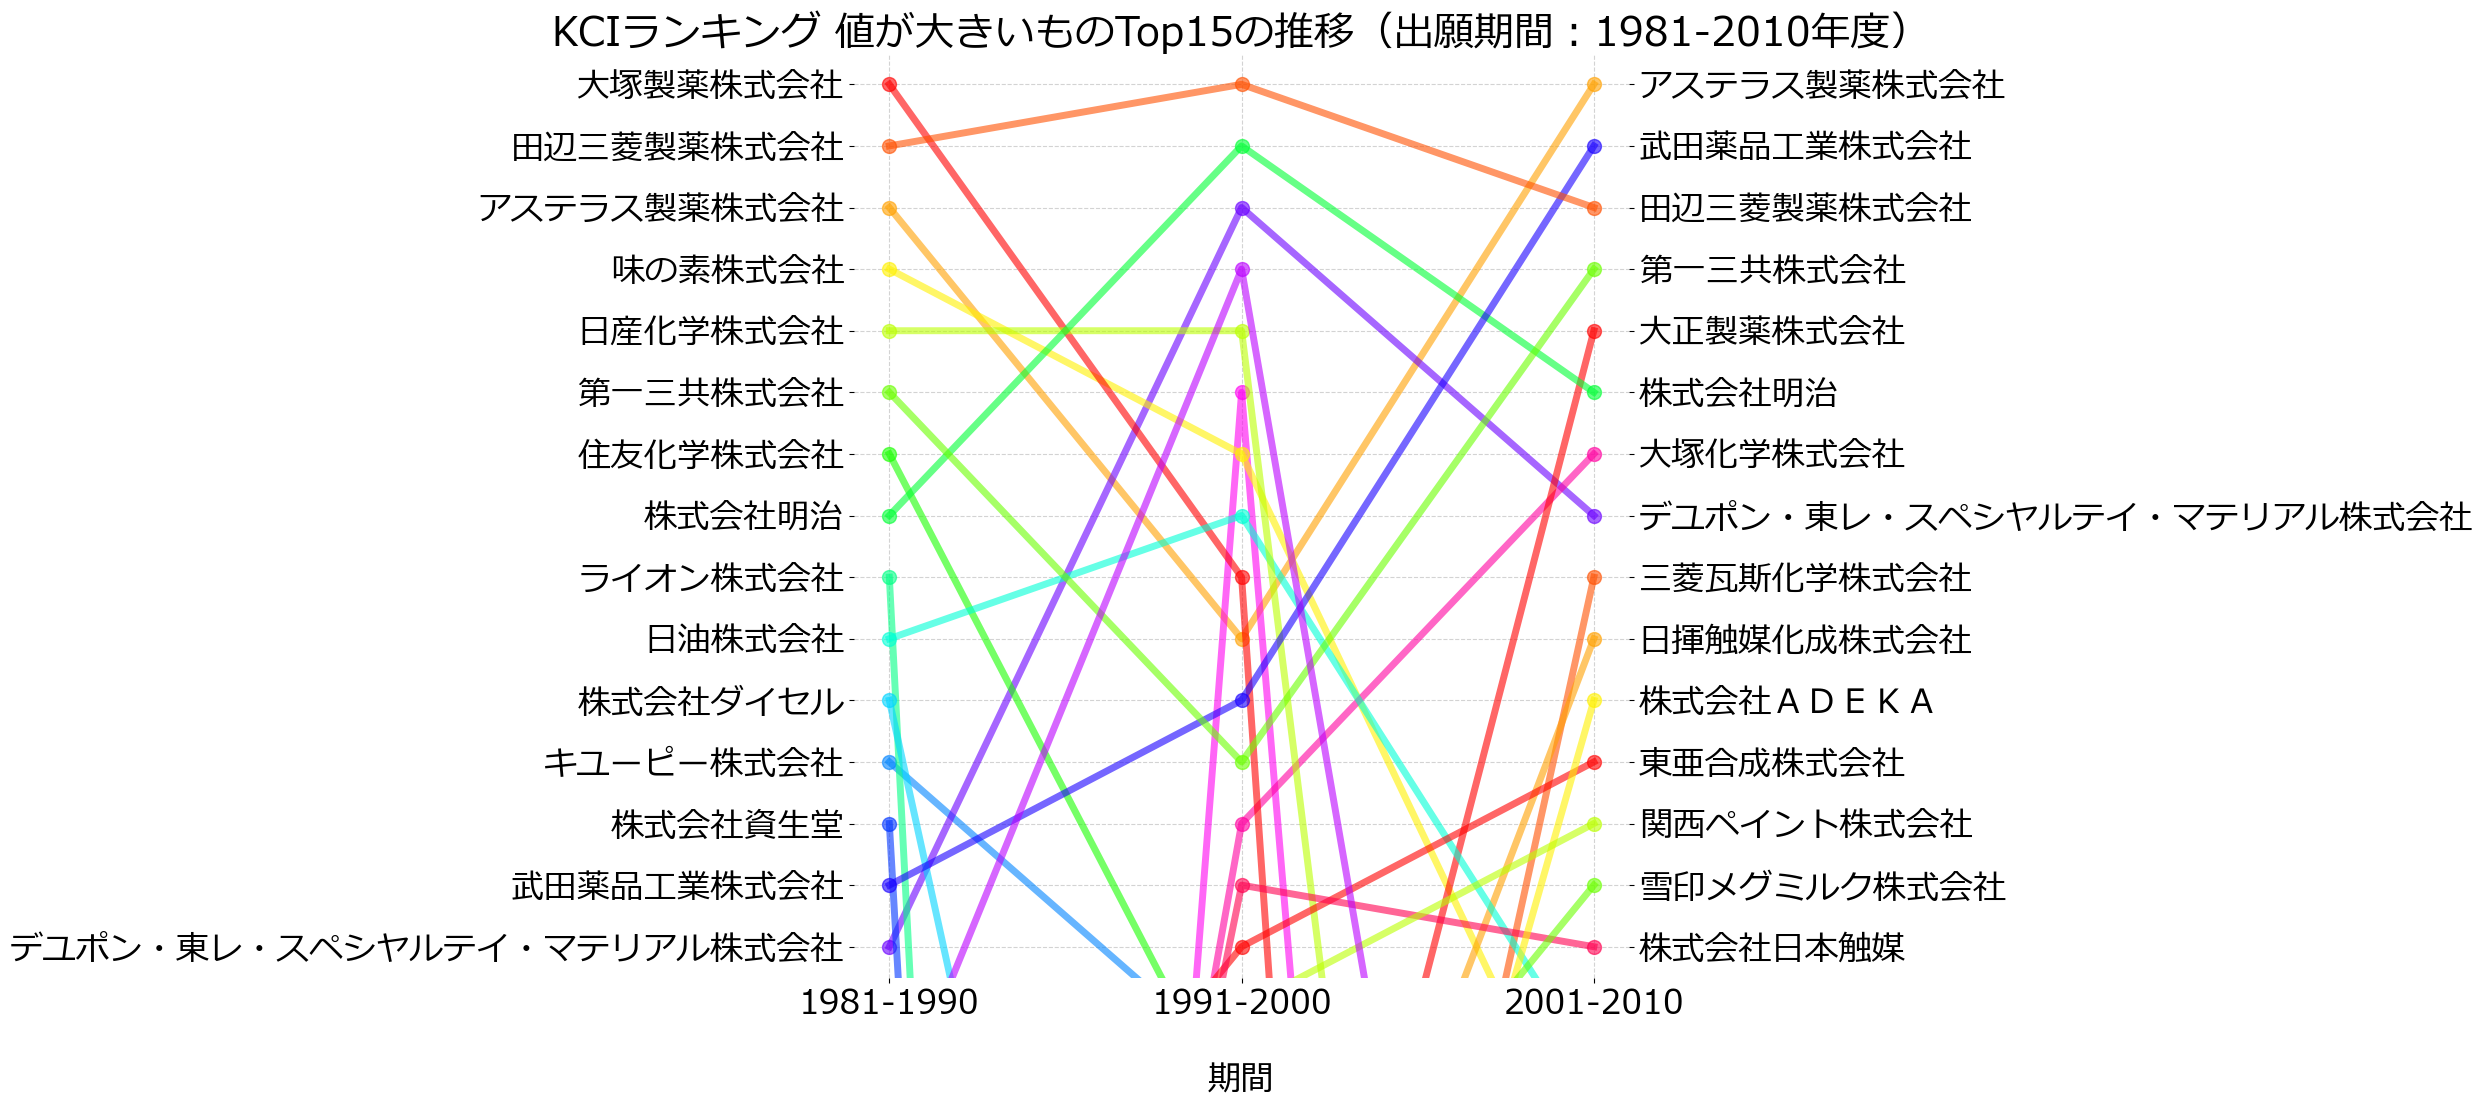

In [11]:
df_dict = {}
combi_dict = {# 1: ['right_person_name', 'diversity', f'特許権者次数(=diversity，k_h0)ランキング 値が小さいものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              # 1: ['right_person_name', '', f'特許権者次数(=diversity，k_h0)ランキング 値が小さいものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              2: ['right_person_name', 'diversity', f'特許権者次数(=diversity，k_h0)ランキング 値が大きいものTop15の推移（出願期間：{year_start}-{year_end}年度）', False], 
            #   3: ['right_person_name', 'eci', f'KCIランキング 値が小さいものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              # 3: ['right_person_name', 'ipc_class_num', f'IPC数ランキング 値が大きいものTop15の推移（出願期間：{year_start}-{year_end}年度）', False], 
              4: ['right_person_name', 'kci', f'KCIランキング 値が大きいものTop15の推移（出願期間：{year_start}-{year_end}年度）', False], 
              # 5: ['ipc_class', 'ubiquity', f'IPC次数(=ubiquity, k_i0)ランキング 低次数Top15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              # 6: ['ipc_class', 'ubiquity', f'IPC次数(=ubiquity, k_i0)ランキング 高次数Top15の推移（出願期間：{year_start}-{year_end}年度）', False], 
            #   7: ['ipc_class', 'pci', f'TCI(Technological Compexity Index)ランキング 値が低いものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              # 8: [classification, 'tci', f'TCI(Technological Compexity Index)ランキング 値が高いものTop15の推移（出願期間：{year_start}-{year_end}年度）', False]
              }



for i, combi in combi_dict.items():
    div_df = df[[f'{ar}_{year_style}_period']+combi[:1+1]].sort_values(by=[f'{ar}_{year_style}_period', combi[1]], ascending=[True, False]).copy()
    div_df = div_df.drop_duplicates(keep='first')
    div_df_dict = {}
    for year in range(year_start, year_end+1, year_range):
        period = f'{year}-{year+year_range-1}'
        div_df_dict[period] = div_df[div_df[f'{ar}_{year_style}_period']==period].copy()
        display(div_df_dict[f'{year}-{year+year_range-1}'].head(15))
    if i==4:
        df['kci_rank'] = df.groupby(f'{ar}_{year_style}_period')[['kci']].rank(ascending=False, method='first').reset_index(drop=False)['kci']
        # display(c_df[c_df['right_person_name'].str.contains('三菱重工業')])
    if i > 4: fs = (12, 15)
    else: fs = (10, 12)
    # display(div_df)
    sample = vr.rank_doubleaxis(div_df_dict, 
                version='kci', 
                    rank_num=15,
                    member_col=combi[0], 
                    num_col=combi[1],
                    prop_dict={
                        'figsize': fs,
                        'xlabel': '期間',
                        'ylabel': '',
                        'title': combi[2],
                        'fontsize': 24, 
                        'year_range': year_range, 
                        'ascending': combi[3], 
                        # 'color': color_dict
                        'color': 'default'
                    })
    plt.savefig(f'{output_dir}figures/{combi[1]}_{ar}_{year_style}_{top_p_or_num[0]}_{top_p_or_num[1]}.png')
    plt.show()


In [12]:
output_dir

'../../output/'

In [13]:
filtered_df = pd.read_csv('../../data/interim/internal/filtered_before_agg/addedclassification.csv', sep=',')
filtered_df

,reg_num,ipc,right_person_name,app_year,app_nendo,reg_year,reg_nendo,schmoch35
0,5684492,G10H 3/18,ＤＲＣ合同会社,2010,2010,2015,2014,34
1,5684512,B62D 57/02,株式会社ＩＨＩエアロスペース,2010,2010,2015,2014,32
2,5684598,A47C 7/62,株式会社オカムラ,2011,2010,2015,2014,33
3,5684620,H01M 4/62,三井化学株式会社,2011,2010,2015,2014,1
4,5684633,G06F 12/02,日本電信電話株式会社,2011,2011,2015,2014,6
...,...,...,...,...,...,...,...,...
5790567,1846641,G09B 23/40,国立科学博物館長,1988,1987,1994,1994,12
5790568,1846642,G09B 23/40,国立科学博物館長,1988,1987,1994,1994,12
5790569,1846643,G09B 23/40,国立科学博物館長,1988,1987,1994,1994,12
5790570,1846644,G09B 23/40,国立科学博物館長,1988,1987,1994,1994,12


In [14]:
top_p_or_num

('num', 500)

In [15]:
# filtered_df['right_person_name'].nunique()
filtered_df[filtered_df[f'{ar}_{year_style}'].isin(range(year_start, year_end+1))]['right_person_name'].nunique()

64330

In [16]:
filtered_df[filtered_df[f'{ar}_{year_style}'].isin(range(year_start, year_end+1))&(filtered_df['right_person_name'].isin(df['right_person_name']))]['right_person_name'].nunique()

500

In [17]:
1734723 / 3602904

0.4814791068538046

In [18]:
10000 / 64330

0.155448468832582